In [418]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle 
import tabulate

In [419]:
with open('./data/test.pkl', 'rb') as fd:
    unpickledTest = pickle.load(fd)

with open('./data/train.pkl', 'rb') as fd:
    unpickledTrain = pickle.load(fd)

In [420]:
#partition Data
testData = unpickledTest

np.random.shuffle(unpickledTrain)
trainData = np.split(unpickledTrain, 10)


In [421]:
maxDegree = 20
numModels = 10

bias2Arr = np.zeros(maxDegree)
varianceArr = np.zeros(maxDegree)
mseArr = np.zeros(maxDegree)

y_res_arr = np.zeros(maxDegree)

for deg in range(maxDegree): 
    predMatrix = np.zeros((numModels,len(testData[:, 0])))
    for i in range(numModels): #should be 0, 10
        poly = PolynomialFeatures(degree = deg+1)
        # reshaping data
        X_train = poly.fit_transform(trainData[i][:, 0].reshape(-1, 1))
        y_train = trainData[i][:, 1].reshape(-1, 1)
        X_test = poly.fit_transform(testData[:, 0].reshape(-1, 1))
        y_test = testData[:, 1].reshape(-1, 1)

        reg = LinearRegression()
        reg.fit(X_train, y_train)
        
        y_pred = reg.predict(X_test)
        predMatrix[i] = y_pred.reshape( len(y_pred))
        predMatrix2 += y_pred.reshape( len(y_pred))
        mseArr[deg] += np.mean(np.square(y_pred - y_test))

    mseArr[deg] /= numModels
    bias2Arr[deg] = np.mean( (np.mean(predMatrix, axis = 0) - testData[:, 1] ) ** 2 ) 
    varianceArr[deg] = np.mean(np.var(predMatrix, axis = 0))

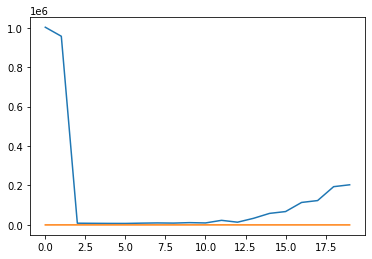

In [422]:
# plt.plot(varianceArr)
plt.plot(bias2Arr)
plt.plot(interceptArr)
# plt.plot(mseArr)

plt.show()

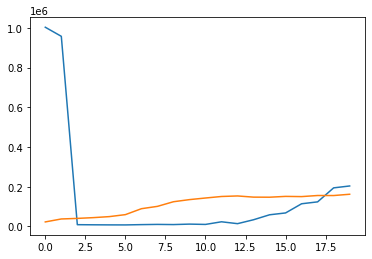

In [423]:
plt.plot(bias2Arr)
plt.plot(varianceArr)
plt.show()


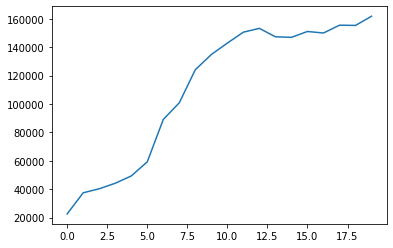

In [424]:
plt.plot(varianceArr)
plt.show()

In [425]:
# irreducible error

irredErrArr = mseArr - bias2Arr - varianceArr

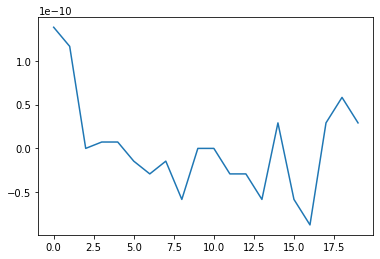

In [426]:

plt.plot(irredErrArr)
# plt.plot(mseArr)
# plt.plot(varianceArr)
# plt.plot(bias2Arr)
# plt.show()

In [444]:
tableDF = pd.DataFrame({
    'degree': range(1, 21),
    'bias': np.sqrt(bias2Arr),
    'variance': varianceArr,
})

In [459]:
tableDF.to_markdown('table.md')